In [23]:
import tensorflow as tf
import keras
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D,Dense,MaxPooling2D,Input,Flatten,Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os

In [8]:
classes=['striped_resize','dotted_resize','checkered_resize','solid']
root='./dataset/'
def creation_dataset():
    X=[]
    Y=[]
    dic={'striped_resize':0,'dotted_resize':1,'checkered_resize':2,'solid':3}
    for c in classes:
        for file in os.listdir(root+c):
            #if file.endswith(".jpg"):
            im= cv2.resize(cv2.imread(root+c+'/'+file,cv2.IMREAD_GRAYSCALE)/255,(150,150))               
            im=np.expand_dims(im,-1)
            X.append(im)
            Y.append(dic[c])
    return X,Y
    

In [9]:
len(os.listdir(root+'checkered_resize'))

2858

In [10]:
X,Y=creation_dataset()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
print(len(X),len(Y))

9565 9565


In [12]:
for i in range(20):    
    print(X[i].shape)

(150, 150, 1)
(150, 150, 1)
(150, 150, 1)
(150, 150, 1)
(150, 150, 1)
(150, 150, 1)
(150, 150, 1)
(150, 150, 1)
(150, 150, 1)
(150, 150, 1)
(150, 150, 1)
(150, 150, 1)
(150, 150, 1)
(150, 150, 1)
(150, 150, 1)
(150, 150, 1)
(150, 150, 1)
(150, 150, 1)
(150, 150, 1)
(150, 150, 1)


In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,shuffle=True,train_size=0.8)

In [14]:
Y_train = np.array(to_categorical(Y_train, num_classes=4))
Y_test = np.array(to_categorical(Y_test, num_classes=4))

In [15]:
shape=X[0].shape

model=Sequential()
model.add(Input(shape=shape))
model.add(Conv2D(16, kernel_size=(5,5), activation="relu"))
model.add(MaxPooling2D((5,5)))
model.add(Conv2D(8, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D((5,5)))
model.add(Flatten())
model.add(Dense(10,activation='relu'))
model.add(Dense(4, activation="softmax"))


model.summary()
 
batch_size = 8
epochs = 20
 


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 16)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 8)         3208      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 8)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 10)                2

2022-03-03 10:58:36.250060: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
model2=Sequential()
model2.add(Input(shape=shape))
model2.add(Conv2D(8, kernel_size=(5,5), activation="relu"))
model2.add(MaxPooling2D((3,3)))
model2.add(Conv2D(16, kernel_size=(5,5), activation="relu"))
model2.add(MaxPooling2D((3,3)))
model2.add(Conv2D(32, kernel_size=(5,5), activation="relu"))
model2.add(MaxPooling2D((3,3)))
model2.add(Flatten())
#model2.add(Dense(10,activation='relu'))
model2.add(Dense(4, activation="softmax"))


model2.summary()
 
batch_size = 5

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 146, 146, 8)       208       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 48, 8)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 44, 44, 16)        3216      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 32)        12832     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 3, 3, 32)        

In [17]:
shape=X[0].shape


model3=Sequential()
model3.add(Input(shape=shape))
model3.add(Conv2D(8, kernel_size=(5,5), activation="relu"))
model3.add(MaxPooling2D((3,3)))
model3.add(Flatten())
model3.add(Dense(4,activation="softmax"))

model3.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 146, 146, 8)       208       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 8)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 18432)             0         
                                                                 
 dense_3 (Dense)             (None, 4)                 73732     
                                                                 
Total params: 73,940
Trainable params: 73,940
Non-trainable params: 0
_________________________________________________________________


In [18]:
epochs=20
batch_size=5
model2.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=["accuracy"])
  
history = model2.fit(
    np.array(X_train),
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(np.array(X_test), Y_test),
    verbose=True
)

Epoch 1/20
1531/1531 [==============================] - 73s 47ms/step - loss: 1.1579 - accuracy: 0.4369 - val_loss: 0.9124 - val_accuracy: 0.6231
Epoch 2/20
1531/1531 [==============================] - 68s 44ms/step - loss: 0.8251 - accuracy: 0.6738 - val_loss: 0.8635 - val_accuracy: 0.6472
Epoch 3/20
1531/1531 [==============================] - 69s 45ms/step - loss: 0.7089 - accuracy: 0.7316 - val_loss: 0.8005 - val_accuracy: 0.6952
Epoch 4/20
1531/1531 [==============================] - 69s 45ms/step - loss: 0.6502 - accuracy: 0.7585 - val_loss: 0.6809 - val_accuracy: 0.7533
Epoch 5/20
1531/1531 [==============================] - 68s 44ms/step - loss: 0.5952 - accuracy: 0.7777 - val_loss: 0.6058 - val_accuracy: 0.7820
Epoch 6/20
1531/1531 [==============================] - 65s 42ms/step - loss: 0.5464 - accuracy: 0.8003 - val_loss: 0.6413 - val_accuracy: 0.7653
Epoch 7/20
1531/1531 [==============================] - 64s 42ms/step - loss: 0.5268 - accuracy: 0.8046 - val_loss: 0.6267 -

In [25]:
import coremltools as ct
class_labels = [0,1,2,3]
classifier_config = ct.ClassifierConfig(class_labels)
_input =ct.ImageType(name="input_1",scale = 1./255)

mlmodel = ct.convert(model, inputs=[_input], classifier_config=classifier_config)
mlmodel.save("tesstmodeltensor.mlmodel")

2022-03-03 11:44:52.448329: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2022-03-03 11:44:52.452118: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1164] Optimization results for grappler item: graph_to_optimize
  function_optimizer: function_optimizer did nothing. time = 0.005ms.
  function_optimizer: function_optimizer did nothing. time = 0.001ms.

2022-03-03 11:44:52.503717: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2022-03-03 11:44:52.510378: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1164] Optimization results for grappler item: graph_to_optimize
  constant_folding: Graph size after: 27 nodes (-8), 34 edges (-8), time = 1.893ms.
  dependency_optimizer: Graph size after: 18 nodes (-9), 17 edges (-17)

In [26]:
img = cv2.imread('./dataset/dotted_resize/dotted6.jpg',cv2.IMREAD_GRAYSCALE)
print(model2.predict([img]))

TypeError: 'method' object is not subscriptable

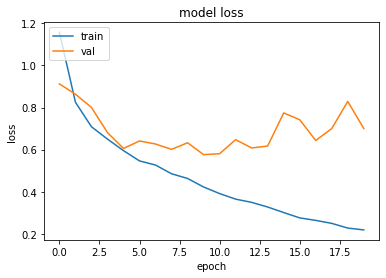

In [19]:
import matplotlib.pyplot as plt 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(X[4])

In [ ]:
c='dotted'
file=os.listdir(root+c)[0]
im= cv2.resize(cv2.imread(root+c+'/'+file,cv2.IMREAD_GRAYSCALE),(150,150))
print(im)
cv2_imshow(im)

In [ ]:
print(Y_train)

In [ ]:
im=np.array([cv2.resize(cv2.imread('IMG_20220216_152907.jpg',cv2.IMREAD_GRAYSCALE)/255,(32,32))])
print(model2.predict(im))


In [ ]:
im=np.array([cv2.resize(cv2.imread('IMG_20220217_162613.jpg',cv2.IMREAD_GRAYSCALE)/255,(32,32))])
print(model2.predict(im))